## Importing all the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image

## Getting the tomato dataset

In [2]:
dataset_directory_location = 'tomato_dataset'

## Listing the directories present inside tomato dataset

In [3]:
os.listdir(dataset_directory_location)

['test', 'train']

## Getting the training and testing directory location

In [4]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'test')

## Listing all the directories present inside 'train' and 'test' directory respectively

In [5]:
os.listdir(train_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
os.listdir(test_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

## Viewing a 'tomato image with bacterial spot image'

In [7]:
tomato_bacterial_spot_img = os.path.join(train_dataset_location, 'Tomato___Bacterial_spot')

In [8]:
os.listdir(tomato_bacterial_spot_img)[:1]

['00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG']

In [9]:
tomato_bacterial_spot_img_read = imread(os.path.join(tomato_bacterial_spot_img, '00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))

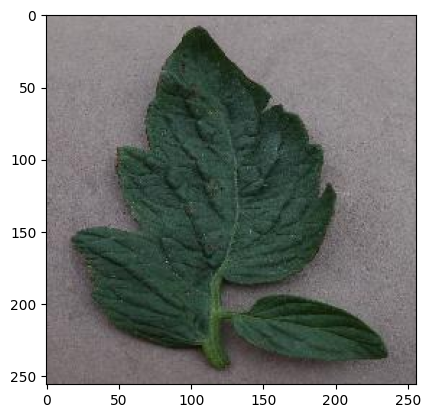

In [10]:
plt.imshow(tomato_bacterial_spot_img_read)

## Getting the shape of the image

In [11]:
tomato_bacterial_spot_img_read.shape

(256, 256, 3)

## Setting the right image shape of the image for our use case

In [12]:
correct_image_shape = (224, 224, 3)

## Performing Data Augmentation

In [13]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest',
                               rescale=1./255)

In [14]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Creating and training the model

In [15]:
model = Sequential()

In [16]:
get_inception_v3_pretrained_model = hub.KerasLayer("https://www.kaggle.com/models/google/inception-v3/frameworks/TensorFlow2/variations/classification/versions/2", trainable=False)

In [17]:
model_inception_v3 = hub.KerasLayer(get_inception_v3_pretrained_model, input_shape=correct_image_shape) 

In [18]:
model.add(model_inception_v3)

model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 batch_normalization (BatchN  (None, 1001)             4004      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               128256    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [20]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [21]:
model.fit(train_image_gen, validation_data=test_image_gen, epochs=30)

Epoch 1/30
625/625 [==============================] - 188s 256ms/step - loss: 1.2903 - accuracy: 0.5593 - val_loss: 0.8721 - val_accuracy: 0.7150
Epoch 2/30
625/625 [==============================] - 149s 238ms/step - loss: 0.9312 - accuracy: 0.6889 - val_loss: 0.7129 - val_accuracy: 0.7400
Epoch 3/30
625/625 [==============================] - 147s 236ms/step - loss: 0.8239 - accuracy: 0.7135 - val_loss: 0.6964 - val_accuracy: 0.7610
Epoch 4/30
625/625 [==============================] - 152s 243ms/step - loss: 0.7763 - accuracy: 0.7356 - val_loss: 0.6557 - val_accuracy: 0.7760
Epoch 5/30
625/625 [==============================] - 159s 254ms/step - loss: 0.7181 - accuracy: 0.7523 - val_loss: 0.5911 - val_accuracy: 0.8020
Epoch 6/30
625/625 [==============================] - 150s 240ms/step - loss: 0.6896 - accuracy: 0.7649 - val_loss: 0.5831 - val_accuracy: 0.8010
Epoch 7/30
625/625 [==============================] - 149s 239ms/step - loss: 0.6850 - accuracy: 0.7650 - val_loss: 0.6157 -

In [22]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

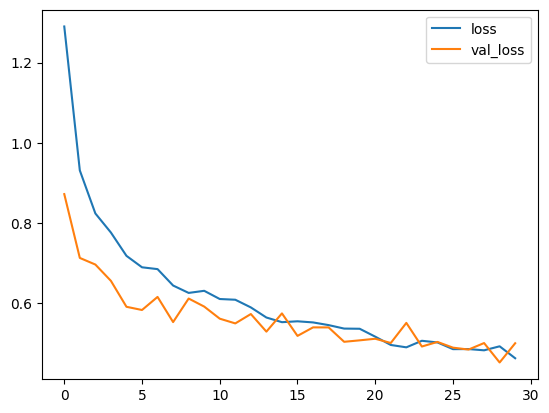

In [23]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

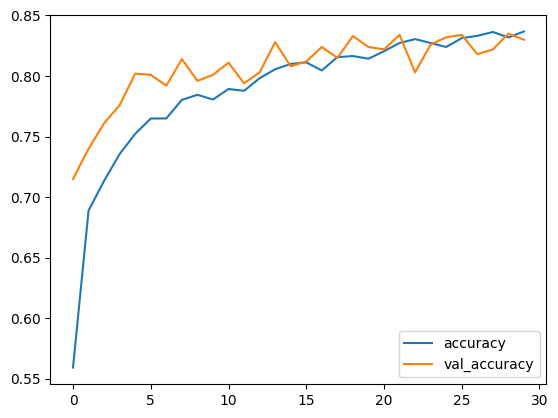

In [24]:
history_df[['accuracy', 'val_accuracy']].plot()

## Calculating the accuracy on training and testing data

In [25]:
model.evaluate(train_image_gen)[1]

625/625 [==============================] - 133s 212ms/step - loss: 0.3062 - accuracy: 0.8943


0.8942999839782715

In [26]:
model.evaluate(test_image_gen)[1]

63/63 [==============================] - 15s 241ms/step - loss: 0.4562 - accuracy: 0.8400


0.8399999737739563

## Making prediction on sample data

In [28]:
sample_img_load = image.load_img('./tomato_dataset/test/Tomato___Late_blight/01d9be0b-c5e7-49db-8cdf-46bd0ef2c6e7___RS_Late.B 7066.JPG', target_size=correct_image_shape)

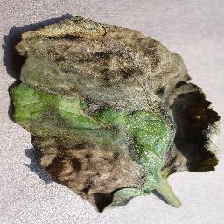

In [29]:
sample_img_load

In [30]:
sample_img_to_arr = image.img_to_array(sample_img_load) / 255

In [31]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr, 0) 

In [32]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 [==============================] - 3s 3s/step


In [33]:
pred_result = np.argmax(prediction)

In [34]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [35]:
pred_final_result = class_names[pred_result]

In [36]:
pred_final_result

'Tomato___Late_blight'

## Saving the model

In [37]:
save_model(model, 'inceptionV3_model')

INFO:tensorflow:Assets written to: inceptionV3_model\assets


INFO:tensorflow:Assets written to: inceptionV3_model\assets
